In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances,silhouette_score
from tqdm import tqdm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Calculating clusters:  22%|██▏       | 2/9 [00:00<00:00, 14.12it/s]

Number of clusters: 2, Silhouette score: 0.4402720543514812
Number of clusters: 3, Silhouette score: 0.7613478432173022
Number of clusters: 4, Silhouette score: 0.7911042588289479


Calculating clusters:  67%|██████▋   | 6/9 [00:00<00:00, 11.69it/s]

Number of clusters: 5, Silhouette score: 0.695043191530187
Number of clusters: 6, Silhouette score: 0.6729514276039533
Number of clusters: 7, Silhouette score: 0.670609440136277


Calculating clusters: 100%|██████████| 9/9 [00:00<00:00, 11.34it/s]

Number of clusters: 8, Silhouette score: 0.6660004827295449
Number of clusters: 9, Silhouette score: 0.530503412890838
Number of clusters: 10, Silhouette score: 0.5389104510576535


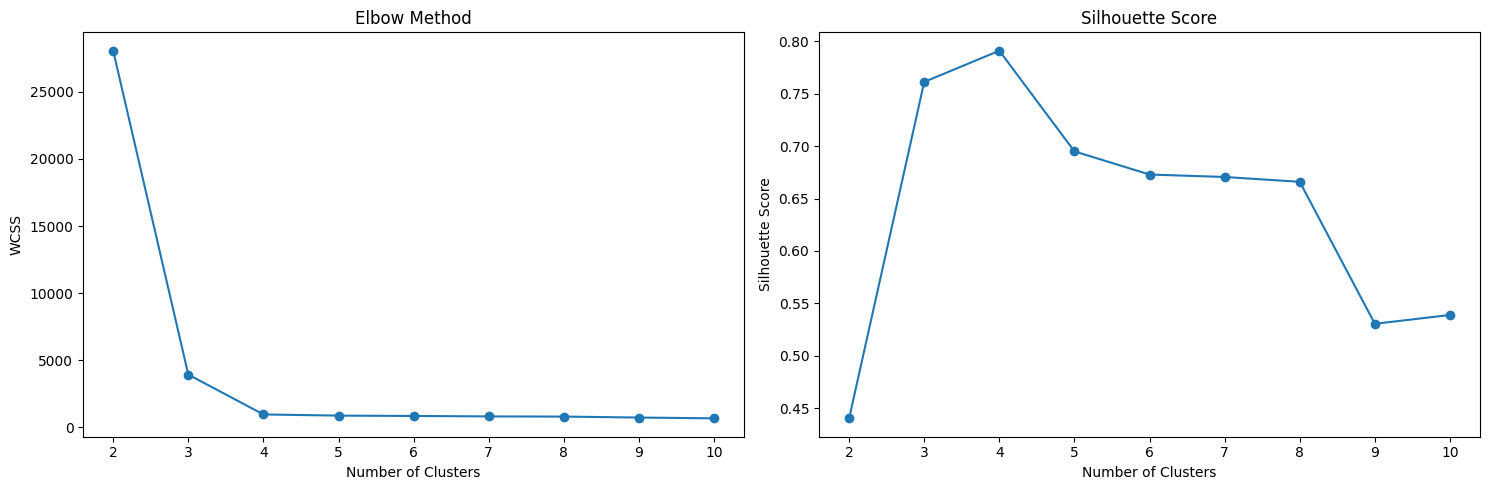


Optimal number of clusters: 4


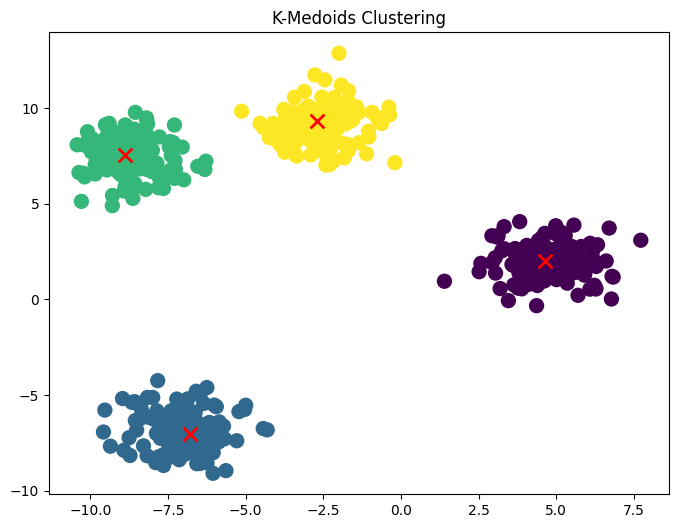

In [2]:
class KMedoids:
    def __init__(self, n_clusters=3, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    def fit(self, X):
        np.random.seed(self.random_state)

        #Step 1: Initialize random select k medoids
        n_samples = X.shape[0]
        self.medoids=np.random.choice(n_samples, self.n_clusters, replace=False)

        for _ in range(self.max_iter):
          #Step 2: Assign each point to the closest medoids
          distances = pairwise_distances(X, X[self.medoids])
          self.labels_=np.argmin(distances, axis=1)

          #Step 3: Update medoids
          new_medoids=[]
          for i in range(self.n_clusters):
            cluster_points=X[self.labels_==i]
            distances_in_cluster=pairwise_distances(cluster_points)
            total_distances=np.sum(distances_in_cluster, axis=1)
            new_medoid_idx=np.argmin(total_distances)   #Find point with smallest total distance
            #get the original index of the new medoids
            original_idx=np.where((X==cluster_points[new_medoid_idx]).all(axis=1))[0][0]
            new_medoids.append(original_idx) #append to list

          new_medoids=np.array(new_medoids)

          #check for convergence
          if np.array_equal(self.medoids, new_medoids):
            break

          self.medoids=new_medoids
        self.cluster_centers_=X[self.medoids]
        return self
    def predict(self, X):
        distances=pairwise_distances(X, self.cluster_centers_)
        return np.argmin(distances, axis=1)

#Generate sample data
X,_ =make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

#elbow method to find the optimal number of cluster
wcss=[]
silhouette_scores=[]
range_n_clusters=range(2,11)

for n_clusters in tqdm(range_n_clusters, desc="Calculating clusters"):
  kmedoids=KMedoids(n_clusters=n_clusters, random_state=42)
  cluster_labels=kmedoids.fit(X).labels_

  #
  distances=pairwise_distances(X, kmedoids.cluster_centers_)
  wcss.append(np.sum(distances[np.arange(X.shape[0]), cluster_labels]**2))

  #
  silhouette_avg=silhouette_score(X, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")


#plotting
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

#visualizing
optimal_k=range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")

kmedoids=KMedoids(n_clusters=optimal_k, random_state=42).fit(X)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=kmedoids.labels_, cmap='viridis',s=100)
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], c='red', marker='x', s=100, linewidths=2)
plt.title("K-Medoids Clustering")
plt.show()